# Lecture: Handling DateTime Data in Pandas

**Objectives**

By the end of this lecture, students will be able to:
1. Understand how to handle datetime types in Pandas.
3. Convert string dates to datetime objects and vice versa.
4. Perform various datetime operations such as indexing, filtering, and resampling.
5. Utilize datetime functionalities for data analysis.

_____

## Introduction to Datetime in Pandas

**What is Datetime?**
Datetime refers to the representation of dates and times in a standard format. In Pandas, datetime objects are essential for time series analysis, data manipulation, and visualization.

Pandas provides two primary types for handling dates and times:
- `datetime64[ns]`: A numpy data type for timestamps, with nanosecond precision.
- `timedelta[ns]`: Represents differences between two datetime objects.

______


## Dataset

Let's create a sample dataset that contains sales data over a month, using string representations for the dates. The dataset will include:
- `date`: Dates of sales in string format.
- `sales`: Amount of sales.
- `category`: Category of the product sold.

In [24]:
import pandas as pd
import numpy as np

# Create a list of dates in string format
date_strings = [
    '2023-02-18 08:45', '2023-01-17 14:30', '2023-05-03 09:15', '2023-02-04 16:20', '2023-12-05 12:00',
    '2023-04-06 18:50', '2023-02-07 10:25', '2023-12-22 13:40', '2023-03-09 11:00', '2023-12-10 15:30',
    '2023-06-11 09:10', '2023-12-01 17:00', '2023-11-13 08:15', '2023-04-14 12:30', '2023-11-15 14:20',
    '2023-08-16 19:45', '2023-11-17 10:10', '2023-11-18 11:50', '2023-05-19 13:30', '2023-10-20 18:25',
    '2023-10-21 14:05', '2023-01-22 15:35', '2023-06-23 09:55', '2023-06-24 16:45', '2023-09-25 08:20',
    '2023-09-26 12:15', '2023-03-27 18:30', '2023-02-28 10:50', '2023-07-29 13:05', '2023-08-30 14:40',
    '2023-10-31 17:55']

sales_data = np.random.randint(1, 10, size=len(date_strings))

categories = ['Electronics', 'Clothing', 'Groceries', 'Home', 'Sport']
category_data = np.random.choice(categories, size=len(date_strings))

In [25]:
sales_df = pd.DataFrame({'date': date_strings, 
                         'sales': sales_data, 
                         'category': category_data})
sales_df

,date,sales,category
0,2023-02-18 08:45,9,Home
1,2023-01-17 14:30,8,Clothing
2,2023-05-03 09:15,5,Electronics
3,2023-02-04 16:20,8,Clothing
4,2023-12-05 12:00,1,Sport
5,2023-04-06 18:50,4,Clothing
6,2023-02-07 10:25,2,Groceries
7,2023-12-22 13:40,1,Home
8,2023-03-09 11:00,6,Sport
9,2023-12-10 15:30,4,Clothing


In [26]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      31 non-null     object
 1   sales     31 non-null     int32 
 2   category  31 non-null     object
dtypes: int32(1), object(2)
memory usage: 752.0+ bytes


______

## Converting Between String and Datetime

To convert the string representation of dates into datetime objects, we can use the `pd.to_datetime()` function.

#### Step-by-Step Conversion
1. **Select the column to convert**: In this case, we will convert the `date` column.
2. **Use `pd.to_datetime()`**: This function automatically detects the format of the date strings and converts them.

In [27]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [28]:
sales_df.head()

,date,sales,category
0,2023-02-18 08:45:00,9,Home
1,2023-01-17 14:30:00,8,Clothing
2,2023-05-03 09:15:00,5,Electronics
3,2023-02-04 16:20:00,8,Clothing
4,2023-12-05 12:00:00,1,Sport


In [29]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      31 non-null     datetime64[ns]
 1   sales     31 non-null     int32         
 2   category  31 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 752.0+ bytes


_____

## Working with Datetime

After converting to datetime, you can easily access components like year, month, day, etc.

The "dt" attribute for datetime columns allows us this conventient access.

In [37]:
sales_df['date'].dt.weekday

0     5
1     1
2     2
3     5
4     1
5     3
6     1
7     4
8     3
9     6
10    6
11    4
12    0
13    4
14    2
15    2
16    4
17    5
18    4
19    4
20    5
21    6
22    4
23    5
24    0
25    1
26    0
27    1
28    5
29    2
30    1
Name: date, dtype: int32

In [68]:
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day
sales_df['hour'] = sales_df['date'].dt.hour
sales_df['minute'] = sales_df['date'].dt.minute
sales_df['weekday'] = sales_df['date'].dt.weekday

sales_df.head()


,date,sales,category,year,month,day,hour,minute,weekday
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45,5
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30,1
2,2023-05-03 09:15:00,5,Electronics,2023,5,3,9,15,2
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20,5
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0,1


In [41]:
# we can also simply sort values on the date column

sales_df.sort_values(by='date')

,date,sales,category,year,month,day,hour,minute
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30
21,2023-01-22 15:35:00,5,Clothing,2023,1,22,15,35
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20
6,2023-02-07 10:25:00,2,Groceries,2023,2,7,10,25
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45
27,2023-02-28 10:50:00,2,Home,2023,2,28,10,50
8,2023-03-09 11:00:00,6,Sport,2023,3,9,11,0
26,2023-03-27 18:30:00,4,Sport,2023,3,27,18,30
5,2023-04-06 18:50:00,4,Clothing,2023,4,6,18,50
13,2023-04-14 12:30:00,2,Groceries,2023,4,14,12,30


____

## Filtering by date

We can filter the data based on specific dates in a natural way.

In [42]:
december_filter = sales_df['month'] == 12

sales_df[december_filter]

,date,sales,category,year,month,day,hour,minute
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0
7,2023-12-22 13:40:00,1,Home,2023,12,22,13,40
9,2023-12-10 15:30:00,4,Clothing,2023,12,10,15,30
11,2023-12-01 17:00:00,4,Clothing,2023,12,1,17,0


In [48]:

december_filter = sales_df['date'].dt.month == 12

sales_df[december_filter]

,date,sales,category,year,month,day,hour,minute
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0
7,2023-12-22 13:40:00,1,Home,2023,12,22,13,40
9,2023-12-10 15:30:00,4,Clothing,2023,12,10,15,30
11,2023-12-01 17:00:00,4,Clothing,2023,12,1,17,0


In [53]:
tuesday_filter = sales_df['date'].dt.weekday == 1 # Tuesday is represented by 0

sales_df[december_filter & tuesday_filter] # yields all sales on Tuesdays in December

,date,sales,category,year,month,day,hour,minute
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0


**isin()**

In [57]:
winter_months_filter = sales_df['date'].dt.month.isin([12, 1, 2]) # mask for winter months

sales_df[winter_months_filter]

,date,sales,category,year,month,day,hour,minute
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0
6,2023-02-07 10:25:00,2,Groceries,2023,2,7,10,25
7,2023-12-22 13:40:00,1,Home,2023,12,22,13,40
9,2023-12-10 15:30:00,4,Clothing,2023,12,10,15,30
11,2023-12-01 17:00:00,4,Clothing,2023,12,1,17,0
21,2023-01-22 15:35:00,5,Clothing,2023,1,22,15,35
27,2023-02-28 10:50:00,2,Home,2023,2,28,10,50


**between()**

In [ ]:
summer_months_filter = sales_df['date'].dt.month.between(6, 8)

sales_df[summer_months_filter]

,date,sales,category,year,month,day,hour,minute
10,2023-06-11 09:10:00,1,Home,2023,6,11,9,10
15,2023-08-16 19:45:00,2,Electronics,2023,8,16,19,45
22,2023-06-23 09:55:00,2,Electronics,2023,6,23,9,55
23,2023-06-24 16:45:00,3,Electronics,2023,6,24,16,45
28,2023-07-29 13:05:00,9,Sport,2023,7,29,13,5
29,2023-08-30 14:40:00,6,Clothing,2023,8,30,14,40


In [66]:
afternoon_hours_filter = sales_df['date'].dt.hour.between(12, 18)

# afternoon_hours_filter = sales_df['date'].dt.hour.isin([12, 13, 14, 15, 16, 17, 18])

sales_df[afternoon_hours_filter]

,date,sales,category,year,month,day,hour,minute
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0
5,2023-04-06 18:50:00,4,Clothing,2023,4,6,18,50
7,2023-12-22 13:40:00,1,Home,2023,12,22,13,40
9,2023-12-10 15:30:00,4,Clothing,2023,12,10,15,30
11,2023-12-01 17:00:00,4,Clothing,2023,12,1,17,0
13,2023-04-14 12:30:00,2,Groceries,2023,4,14,12,30
14,2023-11-15 14:20:00,1,Home,2023,11,15,14,20
18,2023-05-19 13:30:00,9,Home,2023,5,19,13,30


In [67]:
# all sales that occured outside the afternoons

sales_df[~afternoon_hours_filter]

,date,sales,category,year,month,day,hour,minute
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45
2,2023-05-03 09:15:00,5,Electronics,2023,5,3,9,15
6,2023-02-07 10:25:00,2,Groceries,2023,2,7,10,25
8,2023-03-09 11:00:00,6,Sport,2023,3,9,11,0
10,2023-06-11 09:10:00,1,Home,2023,6,11,9,10
12,2023-11-13 08:15:00,1,Groceries,2023,11,13,8,15
15,2023-08-16 19:45:00,2,Electronics,2023,8,16,19,45
16,2023-11-17 10:10:00,2,Clothing,2023,11,17,10,10
17,2023-11-18 11:50:00,1,Clothing,2023,11,18,11,50
22,2023-06-23 09:55:00,2,Electronics,2023,6,23,9,55


____

## Plotting with Datetime

Since datetime is ordered, it's easy to plot data over time.

In [70]:
sales_df.head()

,date,sales,category,year,month,day,hour,minute,weekday
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45,5
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30,1
2,2023-05-03 09:15:00,5,Electronics,2023,5,3,9,15,2
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20,5
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0,1


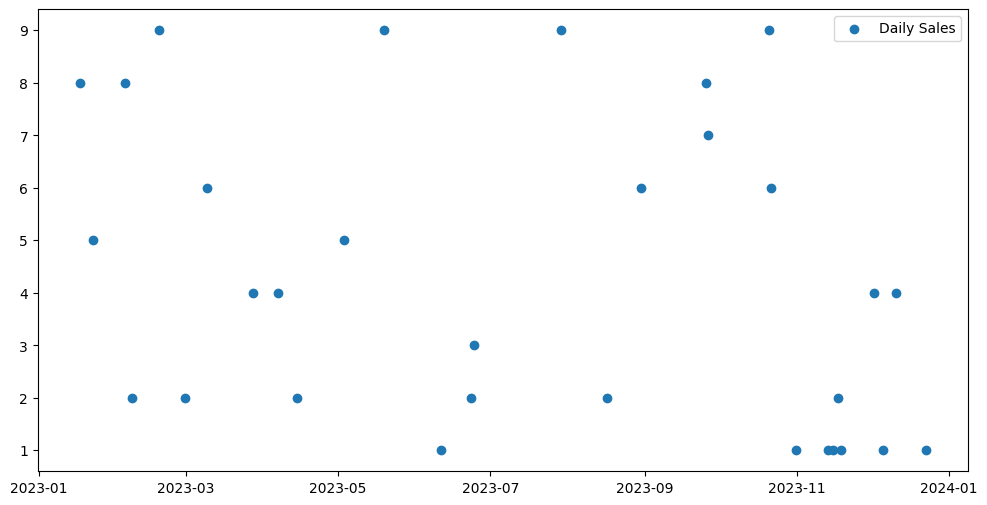

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(sales_df['date'], sales_df['sales'], marker='o', label='Daily Sales')
plt.legend()
plt.show()

______

Ali gillar inte weekday columnen, eftersom att den är lite förvirrande. Detta är subjektivt såklart, men vi kan ändå försöka förbättra detta - om vi vill såklart.

In [76]:
def indicator_to_string_converter(indicator: int) -> str:

    indicator_to_string = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                           3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    
    return indicator_to_string[indicator]

In [78]:
indicator_to_string_converter(5)

'Saturday'

In [80]:
sales_df['weekday'] = sales_df['weekday'].apply(indicator_to_string_converter)

In [81]:
sales_df.head()

,date,sales,category,year,month,day,hour,minute,weekday
0,2023-02-18 08:45:00,9,Home,2023,2,18,8,45,Saturday
1,2023-01-17 14:30:00,8,Clothing,2023,1,17,14,30,Tuesday
2,2023-05-03 09:15:00,5,Electronics,2023,5,3,9,15,Wednesday
3,2023-02-04 16:20:00,8,Clothing,2023,2,4,16,20,Saturday
4,2023-12-05 12:00:00,1,Sport,2023,12,5,12,0,Tuesday


____



## Some more basics, and manual intervention

Here's some more cute basics.

In [82]:
from datetime import datetime

In [153]:

now = datetime.now()

print(now)

2024-11-07 09:55:06.009517


# Specifying a Format with `pd.to_datetime`

Sometimes, we need to provide a specific format to `pd.to_datetime()` because Pandas might not automatically interpret certain date string formats correctly. Specifying the format makes the conversion faster and more accurate.

*When can it go wrong?*

1. **Ambiguous Formats**: Some date strings can be ambiguous. For example, `01-02-2023` could be interpreted as January 2, 2023 (MM-DD-YYYY) or February 1, 2023 (DD-MM-YYYY). Specifying the format clarifies this.
2. **Non-Standard Formats**: Dates in formats like `2023/01/01` or `01-Jan-2023 08:30` are not standard and may not be parsed correctly by default.
3. **Speed Optimization**: Specifying the format can make the conversion faster, especially with large datasets, as Pandas doesn’t have to infer the format.

**The language of datetime**

The `format` parameter in `pd.to_datetime()` accepts standard format codes. Here are a few examples:

**%Y**: Year with century as a number (e.g., '2023').

**%y**: Year without century as a zero-padded number (e.g., '23' for '2023').

**%m**: Month as a either a zero-padded number or straight-up number (e.g., '03' or '3' for March and 12 for December).

**%d**: Day of the month as a zero-padded number or straight-up number (e.g., '09', '9' or '18').

**%H**: Hour (24-hour clock) as a zero-padded number or straight up number(e.g., '12' for noon, and '03' or '3' for 3 o'clock).
    
**%I**: Hour (12-hour clock) as a zero-padded number or straight up number (e.g., '12' for noon, and '03' or '3' for 3 o'clock).
    
**%M**: Minute as a zero-padded number or straight up number (e.g., '03' or '3', and '22').
    
**%S**: Second as a zero-padded number or straight up number (e.g., '00' or '0').
    
**%p**: AM or PM (used with 12-hour clock) (e.g., 'AM' or 'PM').

For example, if you have dates in the format `"DD-MM-YYYY HH:MM"`, you would specify it as `"%d-%m-%Y %H:%M"`.

In [156]:
data = {
    'date': ['01/02/2023 08:30', '15/03/2023 10:45', '28/04/2023 14:20'],
    'sales': [200, 300, 250]
}

df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [158]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [159]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: date
Non-Null Count  Dtype         
--------------  -----         
3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.0 bytes
